In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [63]:
data = pd.read_csv("dataset\dataset.csv")
data_description = pd.read_csv("dataset\symptom_Description.csv")
data_precaustion = pd.read_csv("dataset\symptom_precaution.csv")
#data_severity = pd.read_csv("C:\Users\Hp\Desktop\Projects\DiseaseSymptomDetection\dataset\Symptom-severity.csv")

In [45]:
data = data.drop(labels=data.columns[7:18],axis=1)

In [46]:
for i in data.columns:
    if(data[i].isna().sum() > 0):
        print(data[i].value_counts().index[data[i].value_counts().argmax()])
        data[i].fillna(value=data[i].value_counts().index[data[i].value_counts().argmax()],
        inplace=True)

 high_fever
 headache
 nausea


C:\Users\Hp\AppData\Local\Temp\ipykernel_14432\4071506027.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(value=data[i].value_counts().index[data[i].value_counts().argmax()],
C:\Users\Hp\AppData\Local\Temp\ipykernel_14432\4071506027.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [47]:
for single_column in data.columns[1:]:
 column_unique_values = data[single_column].unique()
 data[single_column].replace(to_replace=column_unique_values,
 value=list(range(column_unique_values.shape[0])),
 inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_14432\1501202254.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[single_column].replace(to_replace=column_unique_values,
C:\Users\Hp\AppData\Local\Temp\ipykernel_14432\1501202254.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[single_column]

In [48]:
for j in data.columns:
    character2int = dict(zip(data[j].unique(),range(len(data[j].unique()))))
    data[j].replace(to_replace=character2int.keys(),value=character2int.values(),
                               inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_14432\73683494.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[j].replace(to_replace=character2int.keys(),value=character2int.values(),
C:\Users\Hp\AppData\Local\Temp\ipykernel_14432\73683494.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[j

<Axes: >

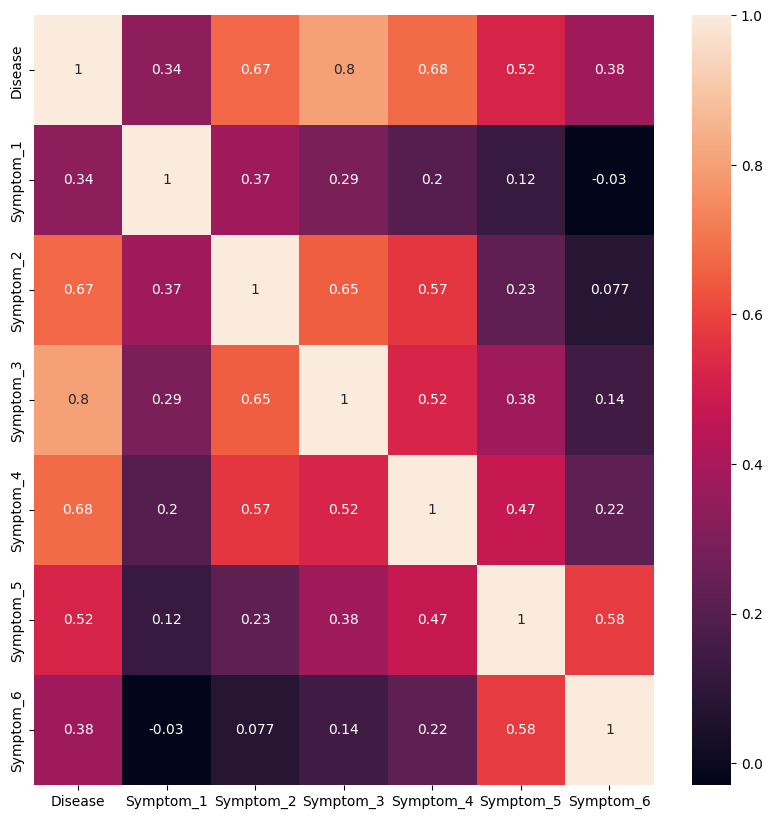

In [49]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 10))  # Set the figure size
sns.heatmap(corr_matrix, annot=True)

In [50]:
target_corr = data.corr()["Disease"].sort_values(ascending=False)
print(target_corr)


Disease      1.000000
Symptom_3    0.799152
Symptom_4    0.680909
Symptom_2    0.673160
Symptom_5    0.519515
Symptom_6    0.375275
Symptom_1    0.337767
Name: Disease, dtype: float64


In [51]:
data = data.drop(labels=["Symptom_1","Symptom_5","Symptom_6"],axis=1)

In [52]:
data

,Disease,Symptom_2,Symptom_3,Symptom_4
0,0,0,0,0
1,0,1,1,1
2,0,1,1,1
3,0,0,1,1
4,0,0,0,1
...,...,...,...,...
4915,36,20,7,43
4916,37,42,46,44
4917,38,44,48,45
4918,39,25,50,46


In [53]:
# Assuming 'data' is your preprocessed DataFrame
X = data.drop(columns=['Disease'])  # Feature matrix
y = data['Disease']  # Target variable

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize Logistic Regression model
model = LogisticRegression(max_iter=5000)

# Step 3: Train the model on the training data
model.fit(X_train, y_train)

# Step 4: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 5: Evaluate the model

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 75.20%


c:\Users\Hp\Desktop\Projects\DiseaseSymptomDetection\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
data

,Disease,Symptom_2,Symptom_3,Symptom_4
0,0,0,0,0
1,0,1,1,1
2,0,1,1,1
3,0,0,1,1
4,0,0,0,1
...,...,...,...,...
4915,36,20,7,43
4916,37,42,46,44
4917,38,44,48,45
4918,39,25,50,46


In [55]:
data = pd.read_csv("dataset\dataset.csv")

In [56]:
label_map = dict(zip(range(len(data["Disease"].unique())),data["Disease"].unique()))

In [57]:
label_map

{0: 'Fungal infection',
 1: 'Allergy',
 2: 'GERD',
 3: 'Chronic cholestasis',
 4: 'Drug Reaction',
 5: 'Peptic ulcer diseae',
 6: 'AIDS',
 7: 'Diabetes ',
 8: 'Gastroenteritis',
 9: 'Bronchial Asthma',
 10: 'Hypertension ',
 11: 'Migraine',
 12: 'Cervical spondylosis',
 13: 'Paralysis (brain hemorrhage)',
 14: 'Jaundice',
 15: 'Malaria',
 16: 'Chicken pox',
 17: 'Dengue',
 18: 'Typhoid',
 19: 'hepatitis A',
 20: 'Hepatitis B',
 21: 'Hepatitis C',
 22: 'Hepatitis D',
 23: 'Hepatitis E',
 24: 'Alcoholic hepatitis',
 25: 'Tuberculosis',
 26: 'Common Cold',
 27: 'Pneumonia',
 28: 'Dimorphic hemmorhoids(piles)',
 29: 'Heart attack',
 30: 'Varicose veins',
 31: 'Hypothyroidism',
 32: 'Hyperthyroidism',
 33: 'Hypoglycemia',
 34: 'Osteoarthristis',
 35: 'Arthritis',
 36: '(vertigo) Paroymsal  Positional Vertigo',
 37: 'Acne',
 38: 'Urinary tract infection',
 39: 'Psoriasis',
 40: 'Impetigo'}

In [60]:
new_data = pd.DataFrame({
    'Symptom_2': [12],  # Example encoded values
    'Symptom_3': [52],
    'Symptom_4': [48],
    # Add other symptoms as needed...
})

# Make predictions
predictions = model.predict(new_data)

predicted_disease = label_map[predictions[0]]

# Print the predicted disease
print("Predicted Disease:", predicted_disease)


Predicted Disease: Impetigo
